In [1]:
import pandas as pd
import numpy as np
import sklearn

# Load dataset
df = pd.read_csv("creditcard.csv")

# Preview first 5 rows
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
# Dataset info
df.info()

# Shape
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [3]:
# Count duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")


if duplicates > 0:
    df.drop_duplicates(inplace=True)


Duplicate rows: 1081


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df[['Amount']])
df['scaled_time'] = scaler.fit_transform(df[['Time']])

# Drop old columns
df.drop(['Time', 'Amount'], axis=1, inplace=True)

df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244200,-1.996823
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342584,-1.996823
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.158900,-1.996802
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.139886,-1.996802
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073813,-1.996781


In [5]:
# Dropping Outliers from scaled time and scaled amount columns
df['scaled_amount'] = df['scaled_amount'].clip(-5, 5)
df['scaled_time'] = df['scaled_time'].clip(-5, 5)

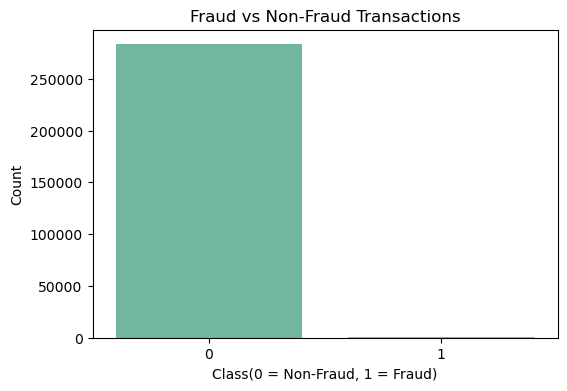

Class
0    283253
1       473
Name: count, dtype: int64
Fraud cases percentage: 0.1667%


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x = 'Class', hue = 'Class', data = df, palette = 'Set2', legend = False)
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Class(0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

fraud_count = df['Class'].value_counts()
print(fraud_count)
print(f"Fraud cases percentage: {fraud_count[1] / fraud_count.sum() * 100:.4f}%")


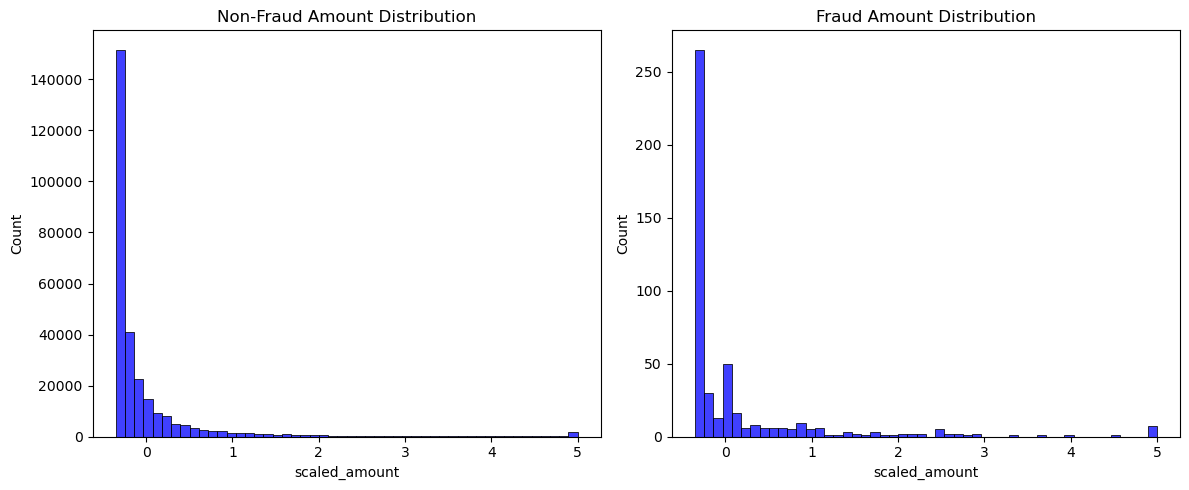

In [7]:
plt.figure(figsize=(12,5))

#Non-Fraud
plt.subplot(1,2,1)
sns.histplot(df[df['Class'] == 0]['scaled_amount'], bins=50, color='blue')
plt.title("Non-Fraud Amount Distribution")

#Fraud
plt.subplot(1,2,2)
sns.histplot(df[df['Class'] == 1]['scaled_amount'], bins=50, color='blue')
plt.title('Fraud Amount Distribution')

plt.tight_layout()
plt.show()

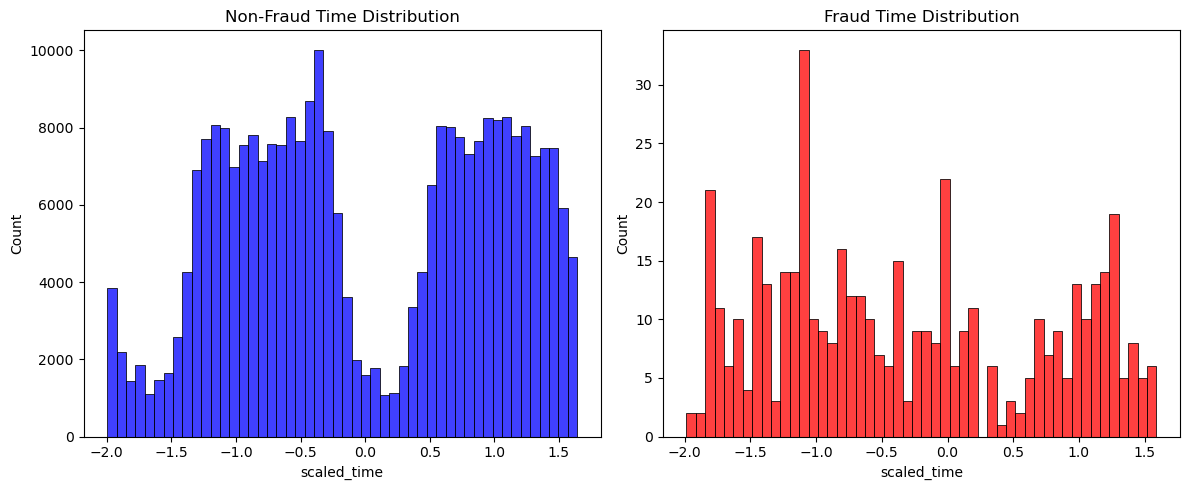

In [8]:
plt.figure(figsize=(12,5))

# Non-Fraud
plt.subplot(1,2,1)
sns.histplot(df[df['Class'] == 0]['scaled_time'], bins=50, color='blue')
plt.title("Non-Fraud Time Distribution")

# Fraud
plt.subplot(1,2,2)
sns.histplot(df[df['Class'] == 1]['scaled_time'], bins=50, color='red')
plt.title("Fraud Time Distribution")

plt.tight_layout()
plt.show()


In [9]:
Correaltion Heatmap to identify features affecting values in Class column the most

SyntaxError: invalid syntax (78197835.py, line 1)

In [ ]:
plt.figure(figsize=(16,7))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Feature Corelation Heatmap')
plt.show()

#correlation of each feature with class
corr_target = corr['Class'].sort_values(ascending = False)
print(corr_target)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top features by absolute correlation
top_features = ['V17', 'V14', 'V12', 'V10', 'V16', 'V3']

plt.figure(figsize=(15, 12))

for i, feature in enumerate(top_features, 1):
    plt.subplot(3, 2, i)  # 3 rows, 2 columns
    sns.boxplot(data=df, x='Class', y=feature, hue='Class', palette='Set2', legend=False)
    plt.title(f"{feature} vs Class", fontsize=12)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='scaled_time', y='scaled_amount', hue='Class', palette='Set2', alpha=0.6)
plt.title("Transaction Amount vs Time (Fraud vs Non-Fraud)")
plt.xlabel("Time (scaled)")
plt.ylabel("Amount (scaled)")
plt.show()


In [ ]:
#creating hour column
df['hour'] = (df['scaled_time'] / 3600) % 24

In [ ]:
#dropping nulls
df = df.dropna()

In [ ]:
#adding is_high_amount binary column flagging top 1% of the transaction amount
amount_threshold = df['scaled_amount'].quantile(0.99)  # top 1% transactions
df['is_high_amount'] = (df['scaled_amount'] > amount_threshold).astype(int)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,         # 20% for testing
    random_state=42,       # Reproducibility
    stratify=y             # Keeps fraud/non-fraud ratio same in both sets
)

#we apply SMOTE to only training set to not affect real world data in test set 
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)



In [ ]:
#Find features most correlated (positively or negatively) with Class
# Absolute correlation values with Class
corr = df.corr()['Class'].abs().sort_values(ascending=False)

# Show top 15
top_corr_features = corr.index[1:16]  # Skip 'Class' itself
print("Top correlated features:\n", top_corr_features)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a quick model on resampled training set
rf = RandomForestClassifier(
    n_estimators=50,        # Number of trees in the forest (50 for speed)
    random_state=42,        # Reproducibility
    n_jobs=-1               # Use all CPU cores for speed
)
rf.fit(X_train_res, y_train_res)


In [ ]:
# Get importances
importances = pd.Series(rf.feature_importances_, index=X_train_res.columns)
importances = importances.sort_values(ascending=False)

print("Top important features from RF:\n", importances.head(15))


In [ ]:
#Keeping top 15 features 
selected_features = list(
    set(top_corr_features).union(set(importances.head(15).index))
)


In [ ]:
print("Selected Features:\n", selected_features)

# Reduce dataset to these features
X_train_sel = X_train_res[selected_features]
X_test_sel = X_test[selected_features]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, precision_recall_curve
import matplotlib.pyplot as plt

# Create and train model
log_reg = LogisticRegression(
    max_iter=1000,      # More iterations for convergence
    random_state=42
)
log_reg.fit(X_train_sel, y_train_res)

# Predictions
y_pred = log_reg.predict(X_test_sel)
y_pred_prob = log_reg.predict_proba(X_test_sel)[:, 1]  # Probabilities for ROC-AUC


In [ ]:
# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC: {roc_auc:.4f}")

# Classification report (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


In [ ]:
#Random Forest Model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Create model
rf_model = RandomForestClassifier(
    n_estimators=200,       # More trees for better performance
    max_depth=None,         # Let trees grow fully
    min_samples_split=2,    # Minimum samples to split
    min_samples_leaf=1,     # Minimum samples per leaf
    random_state=42,
    n_jobs=-1               # Use all cores
)

# Train
rf_model.fit(X_train_sel, y_train_res)

# Predict
y_pred_rf = rf_model.predict(X_test_sel)
y_pred_rf_prob = rf_model.predict_proba(X_test_sel)[:, 1]

# Evaluate
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_pred_rf_prob))
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


In [ ]:
#XGB Boost model 
from xgboost import XGBClassifier

# Create model
xgb_model = XGBClassifier(
    n_estimators=300,         # Trees
    learning_rate=0.1,        # Step size
    max_depth=6,              # Depth of trees
    subsample=0.8,             # Row sampling
    colsample_bytree=0.8,     # Feature sampling
    eval_metric='logloss',    # Avoid warnings
    random_state=42
)

# Train
xgb_model.fit(X_train_sel, y_train_res)

# Predict
y_pred_xgb = xgb_model.predict(X_test_sel)
y_pred_xgb_prob = xgb_model.predict_proba(X_test_sel)[:, 1]

# Evaluate
print("XGBoost ROC-AUC:", roc_auc_score(y_test, y_pred_xgb_prob))
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))


In [ ]:
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for Random Forest
param_dist = {
    'n_estimators': [200, 300, 500],       # More trees for stability
    'max_depth': [None, 10, 20, 30],       # Control tree depth
    'min_samples_split': [2, 5, 10],       # Min samples to split
    'min_samples_leaf': [1, 2, 4],         # Min samples per leaf
    'max_features': ['sqrt', 'log2'],      # Feature selection strategy
    'class_weight': [None, 'balanced']     # Handle imbalance
}

# Create model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Randomized Search
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,                 # Number of random combinations
    scoring='recall',          # Optimize for fraud recall (Class 1)
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on training data
random_search.fit(X_train_sel, y_train_res)

print("Best Parameters:", random_search.best_params_)
print("Best Recall Score:", random_search.best_score_)
'''

In [ ]:
# Retrain final model
best_rf = RandomForestClassifier(
    n_estimators=300,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=30,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

best_rf.fit(X_train_sel, y_train_res)

# Predictions
y_proba = best_rf.predict_proba(X_test_sel)[:, 1]
y_pred = best_rf.predict(X_test_sel)

# Metrics
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))


In [ ]:
#threshold deacresed to 0.45 from default 0.5
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score

threshold = 0.45
y_pred_adjusted = (y_proba >= threshold).astype(int)

print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred_adjusted))


In [ ]:
'''
import joblib
joblib.dump(best_rf, "fraud_detection_rf.pkl")
'''